In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from myfunctions import set_importer
sns.set_style("whitegrid")
%matplotlib inline

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

In [2]:
# importing the data frame
df = set_importer('../analysis-dfs/df.csv')
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
1,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
2,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
3,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
4,48451,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,0,...,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
5,58155,0.0,2011-09-04,Unicef,1656,DWE,34.569266,-9.085515,Kwa Rose Chaula,0,...,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
6,34169,0.0,2011-07-22,Hesawa,1162,DWE,32.920154,-1.947868,Ngomee,0,...,milky,milky,insufficient,insufficient,spring,spring,groundwater,other,other,functional needs repair
7,58500,0.0,2011-10-04,Unicef,1510,DWE,34.586901,-8.980014,Shuleni,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
8,22308,0.0,2013-02-25,Government Of Tanzania,1273,DWE,37.422751,-3.317536,Kwa Tukai,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
9,19685,0.0,2013-03-05,Government Of Tanzania,1443,District council,37.611126,-3.263526,Kwa Kibakaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


# Data Cleaning

Before begining th data cleaning process I will first divide the data fram into a training and testing set. This will prevent data leakage.

In [3]:
X = df.drop('status_group', axis=1)
y = df.status_group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=21)

In [4]:
print(f"X_train has {X_train.shape[1]} columns and {X_train.shape[0]} rows")
print(f"X_test has {X_test.shape[1]} columns and {X_test.shape[0]} rows")

X_train has 40 columns and 18998 rows
X_test has 40 columns and 8143 rows


## Combining X_train and y_train

In [5]:
# If any record is dropped during the data cleaning process it's same result should be dropped so as to avoid problems the fitting process during modelling
X_train = pd.concat([X_train, y_train], axis=1)

## Converting all strings to lower case and stripping whitespaces to avoids similar names being treated as different categories

In [6]:
X_train_cleaned = X_train.applymap(lambda x: x.lower().strip() if type(x) == str else  x)

## Dealing with Null Values

In [7]:
# function for checking  null values in a given train set
def null_identifier(set):
    null_values = set.isna().sum().to_frame()
    null_values.columns = ['Nulls']
    null_values = null_values[null_values['Nulls'] != 0]

    return null_values.sort_values('Nulls', ascending=False) # returning a sorted null value counts.

null_identifier(X_train)

,Nulls
scheme_name,9570
scheme_management,1399
installer,1208
funder,1207
public_meeting,1156
permit,1022
subvillage,112


#### scheme_name

In [8]:
# Scheme name is the name given to a particula well, statistically this has no effect to the target column hence I will drop it.
X_train_cleaned = X_train_cleaned.drop('scheme_name', axis=1)
null_identifier(X_train_cleaned)

,Nulls
scheme_management,1399
installer,1208
funder,1207
public_meeting,1156
permit,1022
subvillage,112


##### scheme_management

In [9]:
#  will drop this column since ther exist a column named 'managed_group' which provides more clear information.
X_train_cleaned = X_train_cleaned.drop('scheme_management', axis=1)
null_identifier(X_train_cleaned)

,Nulls
installer,1208
funder,1207
public_meeting,1156
permit,1022
subvillage,112


#### installer

In [10]:
# replacing the null values in installer with 'not known'
X_train_cleaned.installer = X_train_cleaned.installer.fillna('unknown')
display(X_train_cleaned.installer.isna().sum())

# displaying the next null values
null_identifier(X_train_cleaned)

0

,Nulls
funder,1207
public_meeting,1156
permit,1022
subvillage,112


#### funder

In [11]:
#  replacing funder null values with 'not known'
X_train_cleaned.funder = X_train_cleaned.funder.fillna('notknown')
display(X_train_cleaned.funder.isna().sum())
null_identifier(X_train_cleaned)

0

,Nulls
public_meeting,1156
permit,1022
subvillage,112


#### public_meeting

In [12]:
# This is an irrelevant column hence I will drop it - no way a public meeting has an effect on the condition of a well
X_train_cleaned.drop('public_meeting', axis=1, inplace=True)

null_identifier(X_train_cleaned)

,Nulls
permit,1022
subvillage,112


#### permit

In [13]:
# replacing the null values with the mode  
permit_mode = X_train_cleaned.permit.mode()[0] # checking the most repeated values

In [14]:
# replacing null values in the permit column with True
X_train_cleaned.permit = X_train_cleaned.permit.fillna(permit_mode)
null_identifier(X_train_cleaned)

,Nulls
subvillage,112


#### subvillage

In [15]:
#  will drop this column since already there are longittude and latitudes which describe th geographical postion of a water point
X_train_cleaned.drop('subvillage', axis=1, inplace=True)

null_identifier(X_train_cleaned)

,Nulls


Dealing with null values are done now!!

In [16]:
# displaying the cleaned dataset
display(X_train_cleaned.head(10))
X_train_cleaned.shape

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
19993,18727,0.0,2013-02-02,finw,340,finw,39.483463,-1.060527e+01,sokoni,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19255,70280,0.0,2011-04-12,notknown,0,unknown,34.081729,-8.789536e+00,kwa senjebolo,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
1823,39891,0.0,2011-04-03,notknown,0,unknown,34.294701,-8.701257e+00,ihuvilo a,0,...,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,non functional
11988,14049,2000.0,2011-03-14,dhv,123,dwe,37.851370,-7.197111e+00,kwa daudi,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
15909,64478,0.0,2013-01-16,lvemp,1209,dwe,33.591998,-2.129478e+00,kwa mashara,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,other,other,non functional
11380,9156,0.0,2011-07-23,hesawa,1170,dwe,32.908859,-1.936028e+00,rwatankororo,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other,functional needs repair
3641,41566,0.0,2011-07-10,hesawa,0,dwe,31.474670,-1.471748e+00,kwa jhonas rwegura,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
9236,35811,0.0,2012-10-21,dwssp,0,dwe,0.000000,-2.000000e-08,gurumbaka,0,...,salty abandoned,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
26038,56987,0.0,2013-02-22,government of tanzania,1043,government,35.078078,-1.079965e+01,kwa mzee sililius,0,...,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
26725,61646,1000.0,2011-03-18,government of tanzania,2117,commu,33.933526,-8.957378e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


(18998, 37)

## Dealing with outliers

From EDA the following columns showed signs of having outliers:
* longitude
* population

In [17]:
X_train_cleaned[['longitude', 'population']].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,18998.0,33.863446,6.975914,0.0,32.877258,34.803164,37.442434,40.344301
population,18998.0,169.525318,414.730014,0.0,0.000000,1.000000,230.000000,15300.000000


In [18]:
# function for returning the number of outliers column.
def outliers(set, column, iqr=True):
    # using IQR to determine outliers.
    if (iqr):
        q1 = set[column].quantile(.25)
        q3 = set[column].quantile(.75)

        iqr = q3 - q1
        outliers = list( set[ (set[column]<(q1-1.5*iqr)) | (set[column]>(q1+1.5*iqr))][column] )

    else:
        temp_df = set.copy()
        temp_df['temp_col'] = temp_df[column]
        temp_df['temp_col'] = temp_df['temp_col'].apply(lambda x: (x-temp_df['temp_col'].mean())/temp_df['temp_col'].std() )
        outliers = list( temp_df[ (temp_df['temp_col'] <= -3) & (temp_df['temp_col'] >= 3) ].drop('temp_col', axis=1) )

    return len(outliers), outliers

In [19]:
# function for removing outliers given a certain set and column
def outliers_remover(set, column, iqr=True):
    # using IQR to determine outliers.

    if (iqr):
        q1 = set[column].quantile(.25)
        q3 = set[column].quantile(.75)

        iqr = q3 - q1
        result = set[ (set[column]>(q1 - 1.5*iqr)) & (set[column]<(q3 + 1.5*iqr)) ]


    
    # using z-score to remove outliers
    else:
        temp_df = set.copy()
        temp_df['temp_column'] = temp_df[column]
        temp_df['temp_column'] = temp_df['temp_column'].apply(lambda x: (x-temp_df['temp_column'].mean())/temp_df['temp_column'].std() )
        result = temp_df[ (temp_df['temp_column'] >= -3) & (temp_df['temp_column'] <= 3) ]
        result.drop('temp_column', axis=1, inplace=True) # dropping the term_column.
    
    
    return result

#### longitude

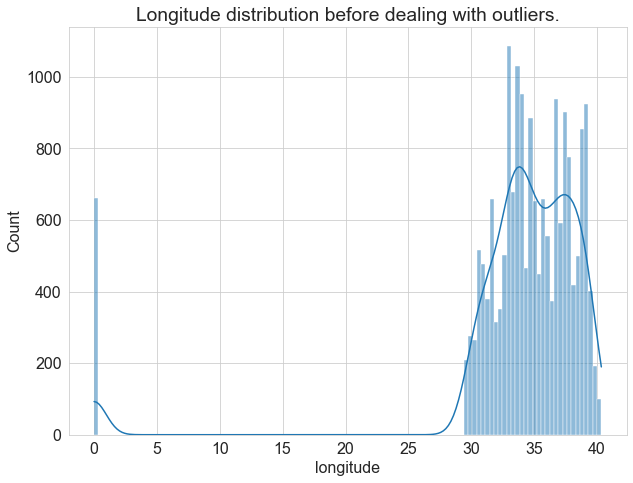

In [20]:
# plotting the distribution before working on the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.longitude, ax=ax, kde=True)
plt.title('Longitude distribution before dealing with outliers.')
plt.show()

In [21]:
# finding the number of ouliers in the longitude column.
longitude_outliers_no, longitude_outliers = outliers(X_train_cleaned, 'longitude')
longitude_outliers_no

929

In [22]:
# theses outliers are many to drop, maybe replacing them with median of the longitudes will
longitudes_median = X_train_cleaned.longitude.median()
longitudes_median

34.8031643

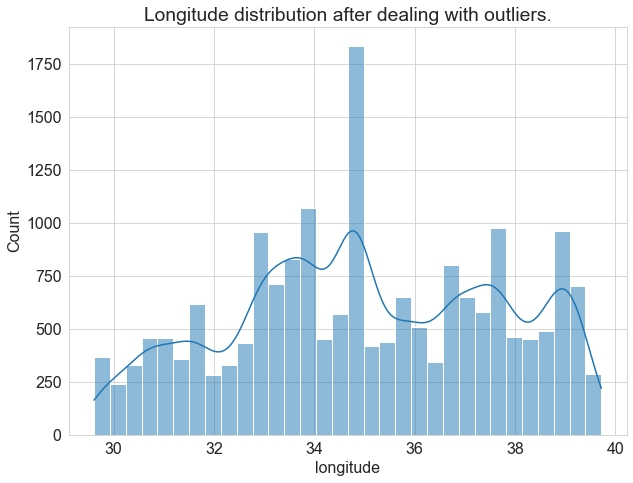

In [23]:
# Replacing the outliers in the longitude field with the median
X_train_cleaned.longitude = X_train_cleaned.longitude.apply(lambda x: longitudes_median if x in longitude_outliers else x)

# plotting the distribution after removing the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.longitude, ax=ax, kde=True)
plt.title('Longitude distribution after dealing with outliers.')
plt.show()

#### population

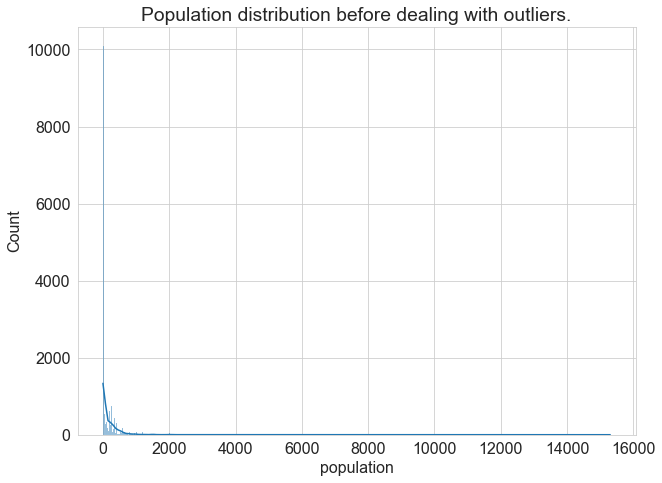

In [24]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.population, ax=ax, kde=True)
plt.title('Population distribution before dealing with outliers.')
plt.show()

Before dealing with any outliers the population column seems to be  filled with very less population numbers, hence any population less than the median will be replaced with the median.

In [25]:
# finding the median in the population column
median_pop = X_train_cleaned.population.median()
X_train_cleaned.population = X_train_cleaned.population.apply(lambda x: median_pop if x<median_pop else x)
len( X_train_cleaned[X_train_cleaned.population < median_pop] ) # checking if the function worked

0

In [26]:
# finding the number of ouliers in the population column.
population_outliers_no, population_outliers = outliers(X_train_cleaned, 'population')
population_outliers_no

2953

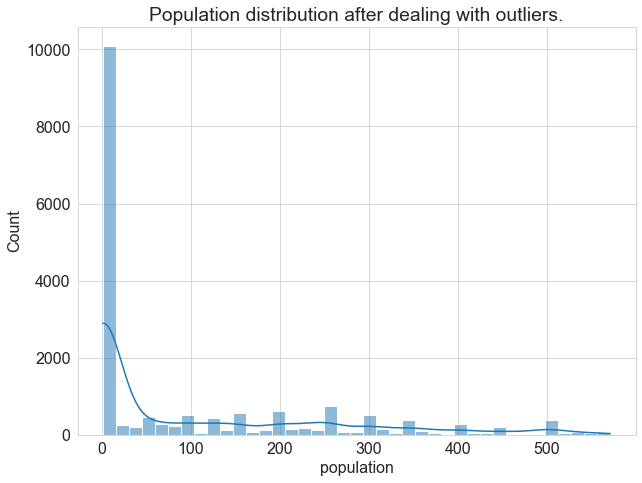

In [27]:
# Removing all the outliers in the population column.
# For this I will use z-score since population seems to follow a normal distribution.
X_train_cleaned = outliers_remover(X_train_cleaned, 'population')

# plotting the distribution after removing the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.population, ax=ax, kde=True)
plt.title('Population distribution after dealing with outliers.')
plt.show()

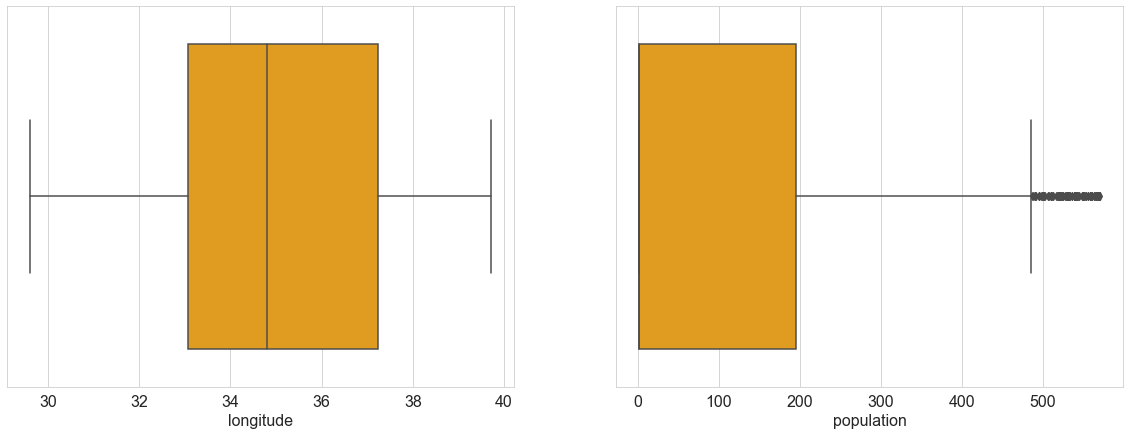

In [28]:
#  checking the distribution once more after removing outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.boxplot(x=X_train_cleaned.longitude, ax=ax[0], color='orange')
sns.boxplot(x=X_train_cleaned.population, ax=ax[1], color='orange')
plt.show()

The population column still show signs of outliers, But better than the intial hence will go on using this one

In [29]:
# desribing the new cleaned set
X_train_cleaned[['longitude', 'population']].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17820.0,34.992266,2.605740,29.610965,33.067885,34.803164,37.240124,39.722766
population,17820.0,99.874130,146.355342,1.000000,1.000000,1.000000,195.000000,571.000000


## Dropping irrelevant columns

In [30]:
# displaying a list of the remaining columns
list(X_train_cleaned.columns)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'recorded_by',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

Some of the columns are redundant (meaning they display information present in another column) and other seem not to provide any useful information at all. Hence in this section I will be dropping these columns.
These columns are:
* id - this is a unique identifier hence has no effect on the condtion of water point.
* amount_tsh - from EDA it was spotted that this column contains lot's of zeros and filled with outliers which would become quite stressful to solve.
* installer - any random  person or compant can install a water pump hence new installers will always emerge, making it hard to predict
* data_recorded - the date recorded has no effect on the condition of a well.
* funder - the column installer displays more information than the funder column, just by facts one who funds the well cannot have any effect on the condition of well it is most likely the installer.
* wpt_name - a water name has no effect its condtion.
* management - all these information is summarized in the management group.
* quantity - same information is in the quantity group.
* num_private - this column seems not to be providing any useful information at all.
* sub_village - already there is longitude and latitude which show the location of a place.
* region - region_code does a better job in describing the location of a place, since it is numerical.
* lga, ward - already there are longitude, latitude, region_code, district_code and a nearby water basin which show the location of a place
* recorded_by - not useful info since it is only GeoData Consultants Ltd who did the recordings
* extraction_type and extraction_type_group - all this are redundant, extraction_type_class displays more information.
* payment_type - this is a repetition of the payment column.
* water_quality - similar information is in the water quality group
* source, source_type - all these columns are summarized in the source_class column
* waterpoint_type - same information is in the water_type_group

In [31]:
columns_to_drop = ['id', 'amount_tsh', 'date_recorded', 'installer', 'funder', 'num_private', 'region', 'lga', 'ward', 'recorded_by', 'wpt_name', 'management', 'quantity', 'extraction_type', 'extraction_type_group', 'payment_type', 'water_quality', 'source', 'source_type', 'waterpoint_type']
# dropping these columns
X_train_cleaned.drop(columns_to_drop, axis=1, inplace=True)

In [32]:
# Displaying the new set
X_train_cleaned.head(10)

,gps_height,longitude,latitude,basin,region_code,district_code,population,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
19993,340,39.483463,-1.060527e+01,ruvuma / southern coast,9,4,300.0,True,1982,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional
19255,0,34.081729,-8.789536e+00,rufiji,12,7,1.0,True,0,gravity,user-group,pay monthly,good,insufficient,surface,communal standpipe,functional needs repair
1823,0,34.294701,-8.701257e+00,rufiji,12,7,1.0,True,0,gravity,user-group,never pay,good,seasonal,surface,communal standpipe,non functional
11988,123,37.851370,-7.197111e+00,wami / ruvu,5,2,250.0,True,1997,other,user-group,pay monthly,salty,insufficient,groundwater,other,non functional
15909,1209,33.591998,-2.129478e+00,lake victoria,20,4,300.0,False,2008,other,user-group,unknown,unknown,unknown,groundwater,other,non functional
11380,1170,32.908859,-1.936028e+00,lake victoria,19,1,500.0,True,1996,other,user-group,never pay,good,insufficient,groundwater,other,functional needs repair
3641,0,31.474670,-1.471748e+00,lake victoria,18,2,1.0,True,0,handpump,user-group,never pay,good,insufficient,groundwater,hand pump,non functional
9236,0,34.803164,-2.000000e-08,lake victoria,17,1,1.0,False,0,handpump,parastatal,never pay,salty,enough,groundwater,hand pump,functional needs repair
26038,1043,35.078078,-1.079965e+01,ruvuma / southern coast,10,3,50.0,True,1990,gravity,user-group,unknown,good,dry,groundwater,communal standpipe,non functional
26725,2117,33.933526,-8.957378e+00,rufiji,11,3,1.0,False,1974,gravity,user-group,pay when scheme fails,good,enough,groundwater,communal standpipe,non functional


In [33]:
X_train_cleaned.shape

(17820, 17)

## Investigating any abnormality in the numbers of the columns

In [34]:
X_train_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
gps_height,17820.0,568.874299,643.542591,-59.000000,0.000000,284.000000,1205.000000,2.770000e+03
longitude,17820.0,34.992266,2.605740,29.610965,33.067885,34.803164,37.240124,3.972277e+01
latitude,17820.0,-5.672069,3.007103,-11.586297,-8.470329,-5.061750,-3.325075,-2.000000e-08
region_code,17820.0,16.705499,19.620996,1.000000,5.000000,13.000000,18.000000,9.900000e+01
district_code,17820.0,6.024523,10.447113,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,17820.0,99.874130,146.355342,1.000000,1.000000,1.000000,195.000000,5.710000e+02
construction_year,17820.0,1199.673232,975.379296,0.000000,0.000000,1978.000000,1998.000000,2.013000e+03


#### construction_year

In [35]:
#  checking the years present int the dataset
np.sort(X_train_cleaned.construction_year.unique())

array([   0, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

It come deduced that some recored have 0 as a year. I'll carry further analysis to see whats's up with them

In [36]:
len(X_train_cleaned[X_train_cleaned.construction_year == 0])

7091

The number of years are too many for me to drop. 0 could represent a categorical variable hence won't drop them

#### district_code

Based on analysis done online Tanzania has no district code 0, hence records imputted with 0 as the district code could errors

In [37]:
# cheking the district codes present in the dataset
np.sort(X_train.district_code.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 13, 23, 30, 33, 43, 53, 60, 62,
       63, 67, 80])

In [38]:
len(X_train_cleaned[X_train_cleaned.district_code == 0])

13

Only 18 rows have district code 0. This are less hence dropping them won't be that much of an issue

In [39]:
X_train_cleaned = X_train_cleaned.loc[X_train_cleaned.district_code != 0]
len(X_train_cleaned[X_train_cleaned.district_code == 0])

0

### Returning back to X and y

In [40]:
X_train = X_train_cleaned.drop('status_group', axis=1)
y_train = X_train_cleaned.status_group

In [41]:
# Reviewing the new cleaned set
display(X_train.shape)
X_train.head(10)

(17807, 16)

,gps_height,longitude,latitude,basin,region_code,district_code,population,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type_group
19993,340,39.483463,-1.060527e+01,ruvuma / southern coast,9,4,300.0,True,1982,submersible,user-group,never pay,good,dry,groundwater,communal standpipe
19255,0,34.081729,-8.789536e+00,rufiji,12,7,1.0,True,0,gravity,user-group,pay monthly,good,insufficient,surface,communal standpipe
1823,0,34.294701,-8.701257e+00,rufiji,12,7,1.0,True,0,gravity,user-group,never pay,good,seasonal,surface,communal standpipe
11988,123,37.851370,-7.197111e+00,wami / ruvu,5,2,250.0,True,1997,other,user-group,pay monthly,salty,insufficient,groundwater,other
15909,1209,33.591998,-2.129478e+00,lake victoria,20,4,300.0,False,2008,other,user-group,unknown,unknown,unknown,groundwater,other
11380,1170,32.908859,-1.936028e+00,lake victoria,19,1,500.0,True,1996,other,user-group,never pay,good,insufficient,groundwater,other
3641,0,31.474670,-1.471748e+00,lake victoria,18,2,1.0,True,0,handpump,user-group,never pay,good,insufficient,groundwater,hand pump
9236,0,34.803164,-2.000000e-08,lake victoria,17,1,1.0,False,0,handpump,parastatal,never pay,salty,enough,groundwater,hand pump
26038,1043,35.078078,-1.079965e+01,ruvuma / southern coast,10,3,50.0,True,1990,gravity,user-group,unknown,good,dry,groundwater,communal standpipe
26725,2117,33.933526,-8.957378e+00,rufiji,11,3,1.0,False,1974,gravity,user-group,pay when scheme fails,good,enough,groundwater,communal standpipe


In [42]:
# exporting the cleaned  X_train
X_train.to_csv('../analysis-dfs/X_train_cleaned.csv')
# exporting X_train_labels
y_train.to_csv('../analysis-dfs/y_train_cleaned.csv')

### Summarizing the whole data cleaning process in one function

In [43]:
def data_cleaner(temp_df, target):
    # combining X and y
    temp_df = pd.concat([temp_df, y], axis=1)
    # converting to lower case and removing any trailing spaces
    temp_df_cleaned = temp_df.applymap(lambda x: x.lower().strip() if type(x) == str else  x)

    # dealing with null values
    # 1. scheme_name column
    temp_df_cleaned = temp_df_cleaned.drop('scheme_name', axis=1)
    # 2. scheme_management
    temp_df_cleaned = temp_df_cleaned.drop('scheme_management', axis=1)
    # 3. installer
    temp_df_cleaned.installer = temp_df_cleaned.installer.fillna('unknown')
    #  4. funder
    temp_df_cleaned.funder = temp_df_cleaned.funder.fillna('notknown')
    # 5. public_meeting
    temp_df_cleaned.drop('public_meeting', axis=1, inplace=True)
    # 6. permit
    permit_mode = temp_df_cleaned.permit.mode()[0]
    temp_df_cleaned.permit = temp_df_cleaned.permit.fillna(permit_mode)
    # 7. subvillage
    temp_df_cleaned.drop('subvillage', axis=1, inplace=True)

    # dealing with outliers
    # 1. longitude
    longitudes_median = temp_df_cleaned.longitude.median()
    temp_df_cleaned.longitude = temp_df_cleaned.longitude.apply(lambda x: longitudes_median if x in longitude_outliers else x)

    # 2.population
    median_pop = temp_df_cleaned.population.median()
    temp_df_cleaned.population = temp_df_cleaned.population.apply(lambda x: median_pop if x<median_pop else x)
    temp_df_cleaned = outliers_remover(temp_df_cleaned, 'population')

    # dropping irrelevant columns
    columns_to_drop = ['id', 'amount_tsh', 'date_recorded', 'installer', 'funder', 'num_private', 'region', 'lga', 'ward', 'recorded_by', 'wpt_name', 'management', 'quantity', 'extraction_type', 'extraction_type_group', 'payment_type', 'water_quality', 'source', 'source_type', 'waterpoint_type']

    # dropping these columns
    temp_df_cleaned.drop(columns_to_drop, axis=1, inplace=True)

    # abnormality
    # district_code
    temp_df_cleaned = temp_df_cleaned.loc[temp_df_cleaned.district_code != 0]

    # splitting back to normal
    X_temp_df = temp_df_cleaned.drop('status_group', axis=1)
    y_temp_df = temp_df_cleaned['status_group']
    return X_temp_df, y_temp_df

In [44]:
X_test_cleaned, y_test_cleaned = data_cleaner(X_test, y_test)

In [45]:
X_test_cleaned.shape

(7626, 16)

In [46]:
y_test_cleaned.shape

(7626,)

In [47]:
# exporting the cleaned X_test 
X_test_cleaned.to_csv('../analysis-dfs/X_test_cleaned.csv')
# exporting y_test
y_test_cleaned.to_csv('../analysis-dfs/y_test_cleaned.csv')